# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [31]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

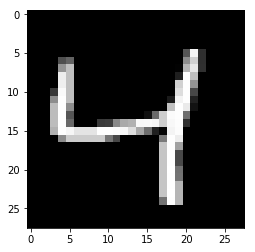

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [37]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 784 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,[None,784])
targets_ = tf.placeholder(tf.float32,[None,784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,784,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [38]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [39]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6957
Epoch: 1/20... Training loss: 0.6454
Epoch: 1/20... Training loss: 0.5918
Epoch: 1/20... Training loss: 0.5298
Epoch: 1/20... Training loss: 0.4659
Epoch: 1/20... Training loss: 0.4036
Epoch: 1/20... Training loss: 0.3576
Epoch: 1/20... Training loss: 0.3271
Epoch: 1/20... Training loss: 0.3092
Epoch: 1/20... Training loss: 0.3118
Epoch: 1/20... Training loss: 0.2821
Epoch: 1/20... Training loss: 0.2743
Epoch: 1/20... Training loss: 0.2719
Epoch: 1/20... Training loss: 0.2895
Epoch: 1/20... Training loss: 0.2771
Epoch: 1/20... Training loss: 0.2715
Epoch: 1/20... Training loss: 0.2670
Epoch: 1/20... Training loss: 0.2518
Epoch: 1/20... Training loss: 0.2495
Epoch: 1/20... Training loss: 0.2586
Epoch: 1/20... Training loss: 0.2465
Epoch: 1/20... Training loss: 0.2476
Epoch: 1/20... Training loss: 0.2298
Epoch: 1/20... Training loss: 0.2356
Epoch: 1/20... Training loss: 0.2286
Epoch: 1/20... Training loss: 0.2202
Epoch: 1/20... Training loss: 0.2180
E

Epoch: 1/20... Training loss: 0.0912
Epoch: 1/20... Training loss: 0.0907
Epoch: 1/20... Training loss: 0.0866
Epoch: 1/20... Training loss: 0.0913
Epoch: 1/20... Training loss: 0.0893
Epoch: 1/20... Training loss: 0.0931
Epoch: 1/20... Training loss: 0.0891
Epoch: 1/20... Training loss: 0.0868
Epoch: 1/20... Training loss: 0.0889
Epoch: 1/20... Training loss: 0.0855
Epoch: 1/20... Training loss: 0.0847
Epoch: 1/20... Training loss: 0.0871
Epoch: 1/20... Training loss: 0.0890
Epoch: 1/20... Training loss: 0.0891
Epoch: 1/20... Training loss: 0.0908
Epoch: 1/20... Training loss: 0.0865
Epoch: 1/20... Training loss: 0.0874
Epoch: 1/20... Training loss: 0.0868
Epoch: 1/20... Training loss: 0.0841
Epoch: 1/20... Training loss: 0.0848
Epoch: 1/20... Training loss: 0.0863
Epoch: 1/20... Training loss: 0.0864
Epoch: 1/20... Training loss: 0.0867
Epoch: 1/20... Training loss: 0.0884
Epoch: 1/20... Training loss: 0.0860
Epoch: 1/20... Training loss: 0.0854
Epoch: 1/20... Training loss: 0.0883
E

Epoch: 2/20... Training loss: 0.0737
Epoch: 2/20... Training loss: 0.0726
Epoch: 2/20... Training loss: 0.0754
Epoch: 2/20... Training loss: 0.0725
Epoch: 2/20... Training loss: 0.0755
Epoch: 2/20... Training loss: 0.0724
Epoch: 2/20... Training loss: 0.0745
Epoch: 2/20... Training loss: 0.0733
Epoch: 2/20... Training loss: 0.0757
Epoch: 2/20... Training loss: 0.0743
Epoch: 2/20... Training loss: 0.0746
Epoch: 2/20... Training loss: 0.0757
Epoch: 2/20... Training loss: 0.0742
Epoch: 2/20... Training loss: 0.0747
Epoch: 2/20... Training loss: 0.0728
Epoch: 2/20... Training loss: 0.0722
Epoch: 2/20... Training loss: 0.0760
Epoch: 2/20... Training loss: 0.0731
Epoch: 2/20... Training loss: 0.0733
Epoch: 2/20... Training loss: 0.0733
Epoch: 2/20... Training loss: 0.0752
Epoch: 2/20... Training loss: 0.0745
Epoch: 2/20... Training loss: 0.0721
Epoch: 2/20... Training loss: 0.0747
Epoch: 2/20... Training loss: 0.0742
Epoch: 2/20... Training loss: 0.0719
Epoch: 2/20... Training loss: 0.0710
E

Epoch: 3/20... Training loss: 0.0688
Epoch: 3/20... Training loss: 0.0721
Epoch: 3/20... Training loss: 0.0697
Epoch: 3/20... Training loss: 0.0684
Epoch: 3/20... Training loss: 0.0700
Epoch: 3/20... Training loss: 0.0703
Epoch: 3/20... Training loss: 0.0701
Epoch: 3/20... Training loss: 0.0702
Epoch: 3/20... Training loss: 0.0701
Epoch: 3/20... Training loss: 0.0699
Epoch: 3/20... Training loss: 0.0704
Epoch: 3/20... Training loss: 0.0703
Epoch: 3/20... Training loss: 0.0672
Epoch: 3/20... Training loss: 0.0683
Epoch: 3/20... Training loss: 0.0693
Epoch: 3/20... Training loss: 0.0704
Epoch: 3/20... Training loss: 0.0696
Epoch: 3/20... Training loss: 0.0695
Epoch: 3/20... Training loss: 0.0689
Epoch: 3/20... Training loss: 0.0704
Epoch: 3/20... Training loss: 0.0702
Epoch: 3/20... Training loss: 0.0706
Epoch: 3/20... Training loss: 0.0700
Epoch: 3/20... Training loss: 0.0717
Epoch: 3/20... Training loss: 0.0701
Epoch: 3/20... Training loss: 0.0699
Epoch: 3/20... Training loss: 0.0684
E

Epoch: 3/20... Training loss: 0.0693
Epoch: 3/20... Training loss: 0.0667
Epoch: 3/20... Training loss: 0.0680
Epoch: 3/20... Training loss: 0.0681
Epoch: 3/20... Training loss: 0.0682
Epoch: 3/20... Training loss: 0.0683
Epoch: 3/20... Training loss: 0.0656
Epoch: 4/20... Training loss: 0.0671
Epoch: 4/20... Training loss: 0.0685
Epoch: 4/20... Training loss: 0.0679
Epoch: 4/20... Training loss: 0.0691
Epoch: 4/20... Training loss: 0.0678
Epoch: 4/20... Training loss: 0.0669
Epoch: 4/20... Training loss: 0.0646
Epoch: 4/20... Training loss: 0.0674
Epoch: 4/20... Training loss: 0.0671
Epoch: 4/20... Training loss: 0.0681
Epoch: 4/20... Training loss: 0.0702
Epoch: 4/20... Training loss: 0.0669
Epoch: 4/20... Training loss: 0.0666
Epoch: 4/20... Training loss: 0.0661
Epoch: 4/20... Training loss: 0.0686
Epoch: 4/20... Training loss: 0.0691
Epoch: 4/20... Training loss: 0.0687
Epoch: 4/20... Training loss: 0.0649
Epoch: 4/20... Training loss: 0.0649
Epoch: 4/20... Training loss: 0.0662
E

Epoch: 4/20... Training loss: 0.0661
Epoch: 4/20... Training loss: 0.0680
Epoch: 4/20... Training loss: 0.0657
Epoch: 4/20... Training loss: 0.0654
Epoch: 4/20... Training loss: 0.0671
Epoch: 4/20... Training loss: 0.0660
Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0667
Epoch: 4/20... Training loss: 0.0677
Epoch: 4/20... Training loss: 0.0646
Epoch: 4/20... Training loss: 0.0660
Epoch: 4/20... Training loss: 0.0658
Epoch: 4/20... Training loss: 0.0670
Epoch: 4/20... Training loss: 0.0666
Epoch: 4/20... Training loss: 0.0664
Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0664
Epoch: 4/20... Training loss: 0.0662
Epoch: 4/20... Training loss: 0.0667
Epoch: 4/20... Training loss: 0.0668
Epoch: 4/20... Training loss: 0.0655
Epoch: 4/20... Training loss: 0.0669
Epoch: 4/20... Training loss: 0.0656
Epoch: 4/20... Training loss: 0.0651
Epoch: 4/20... Training loss: 0.0661
Epoch: 4/20... Training loss: 0.0658
Epoch: 4/20... Training loss: 0.0675
E

Epoch: 5/20... Training loss: 0.0675
Epoch: 5/20... Training loss: 0.0665
Epoch: 5/20... Training loss: 0.0674
Epoch: 5/20... Training loss: 0.0660
Epoch: 5/20... Training loss: 0.0676
Epoch: 5/20... Training loss: 0.0666
Epoch: 5/20... Training loss: 0.0662
Epoch: 5/20... Training loss: 0.0651
Epoch: 5/20... Training loss: 0.0657
Epoch: 5/20... Training loss: 0.0643
Epoch: 5/20... Training loss: 0.0642
Epoch: 5/20... Training loss: 0.0661
Epoch: 5/20... Training loss: 0.0669
Epoch: 5/20... Training loss: 0.0684
Epoch: 5/20... Training loss: 0.0638
Epoch: 5/20... Training loss: 0.0674
Epoch: 5/20... Training loss: 0.0657
Epoch: 5/20... Training loss: 0.0652
Epoch: 5/20... Training loss: 0.0653
Epoch: 5/20... Training loss: 0.0641
Epoch: 5/20... Training loss: 0.0675
Epoch: 5/20... Training loss: 0.0629
Epoch: 5/20... Training loss: 0.0653
Epoch: 5/20... Training loss: 0.0651
Epoch: 5/20... Training loss: 0.0661
Epoch: 5/20... Training loss: 0.0670
Epoch: 5/20... Training loss: 0.0673
E

Epoch: 6/20... Training loss: 0.0663
Epoch: 6/20... Training loss: 0.0652
Epoch: 6/20... Training loss: 0.0643
Epoch: 6/20... Training loss: 0.0653
Epoch: 6/20... Training loss: 0.0661
Epoch: 6/20... Training loss: 0.0658
Epoch: 6/20... Training loss: 0.0660
Epoch: 6/20... Training loss: 0.0635
Epoch: 6/20... Training loss: 0.0654
Epoch: 6/20... Training loss: 0.0661
Epoch: 6/20... Training loss: 0.0668
Epoch: 6/20... Training loss: 0.0676
Epoch: 6/20... Training loss: 0.0649
Epoch: 6/20... Training loss: 0.0647
Epoch: 6/20... Training loss: 0.0638
Epoch: 6/20... Training loss: 0.0654
Epoch: 6/20... Training loss: 0.0669
Epoch: 6/20... Training loss: 0.0646
Epoch: 6/20... Training loss: 0.0659
Epoch: 6/20... Training loss: 0.0639
Epoch: 6/20... Training loss: 0.0666
Epoch: 6/20... Training loss: 0.0636
Epoch: 6/20... Training loss: 0.0672
Epoch: 6/20... Training loss: 0.0624
Epoch: 6/20... Training loss: 0.0653
Epoch: 6/20... Training loss: 0.0656
Epoch: 6/20... Training loss: 0.0664
E

Epoch: 6/20... Training loss: 0.0657
Epoch: 6/20... Training loss: 0.0662
Epoch: 6/20... Training loss: 0.0657
Epoch: 6/20... Training loss: 0.0654
Epoch: 6/20... Training loss: 0.0640
Epoch: 6/20... Training loss: 0.0657
Epoch: 6/20... Training loss: 0.0686
Epoch: 6/20... Training loss: 0.0634
Epoch: 6/20... Training loss: 0.0659
Epoch: 6/20... Training loss: 0.0659
Epoch: 6/20... Training loss: 0.0645
Epoch: 6/20... Training loss: 0.0656
Epoch: 6/20... Training loss: 0.0653
Epoch: 6/20... Training loss: 0.0642
Epoch: 6/20... Training loss: 0.0644
Epoch: 7/20... Training loss: 0.0648
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0656
Epoch: 7/20... Training loss: 0.0660
Epoch: 7/20... Training loss: 0.0661
Epoch: 7/20... Training loss: 0.0632
Epoch: 7/20... Training loss: 0.0654
Epoch: 7/20... Training loss: 0.0654
Epoch: 7/20... Training loss: 0.0653
Epoch: 7/20... Training loss: 0.0632
Epoch: 7/20... Training loss: 0.0646
E

Epoch: 7/20... Training loss: 0.0654
Epoch: 7/20... Training loss: 0.0643
Epoch: 7/20... Training loss: 0.0652
Epoch: 7/20... Training loss: 0.0630
Epoch: 7/20... Training loss: 0.0655
Epoch: 7/20... Training loss: 0.0659
Epoch: 7/20... Training loss: 0.0666
Epoch: 7/20... Training loss: 0.0651
Epoch: 7/20... Training loss: 0.0661
Epoch: 7/20... Training loss: 0.0653
Epoch: 7/20... Training loss: 0.0643
Epoch: 7/20... Training loss: 0.0650
Epoch: 7/20... Training loss: 0.0661
Epoch: 7/20... Training loss: 0.0656
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0670
Epoch: 7/20... Training loss: 0.0662
Epoch: 7/20... Training loss: 0.0657
Epoch: 7/20... Training loss: 0.0633
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0657
Epoch: 7/20... Training loss: 0.0657
Epoch: 7/20... Training loss: 0.0654
Epoch: 7/20... Training loss: 0.0649
Epoch: 7/20... Training loss: 0.0662
Epoch: 7/20... Training loss: 0.0641
Epoch: 7/20... Training loss: 0.0636
E

Epoch: 8/20... Training loss: 0.0640
Epoch: 8/20... Training loss: 0.0648
Epoch: 8/20... Training loss: 0.0638
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0657
Epoch: 8/20... Training loss: 0.0663
Epoch: 8/20... Training loss: 0.0656
Epoch: 8/20... Training loss: 0.0668
Epoch: 8/20... Training loss: 0.0648
Epoch: 8/20... Training loss: 0.0651
Epoch: 8/20... Training loss: 0.0634
Epoch: 8/20... Training loss: 0.0626
Epoch: 8/20... Training loss: 0.0639
Epoch: 8/20... Training loss: 0.0624
Epoch: 8/20... Training loss: 0.0662
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0673
Epoch: 8/20... Training loss: 0.0642
Epoch: 8/20... Training loss: 0.0644
Epoch: 8/20... Training loss: 0.0647
Epoch: 8/20... Training loss: 0.0644
Epoch: 8/20... Training loss: 0.0656
Epoch: 8/20... Training loss: 0.0646
Epoch: 8/20... Training loss: 0.0645
Epoch: 8/20... Training loss: 0.0643
Epoch: 8/20... Training loss: 0.0633
Epoch: 8/20... Training loss: 0.0649
E

Epoch: 9/20... Training loss: 0.0647
Epoch: 9/20... Training loss: 0.0636
Epoch: 9/20... Training loss: 0.0649
Epoch: 9/20... Training loss: 0.0645
Epoch: 9/20... Training loss: 0.0643
Epoch: 9/20... Training loss: 0.0654
Epoch: 9/20... Training loss: 0.0646
Epoch: 9/20... Training loss: 0.0655
Epoch: 9/20... Training loss: 0.0645
Epoch: 9/20... Training loss: 0.0649
Epoch: 9/20... Training loss: 0.0645
Epoch: 9/20... Training loss: 0.0671
Epoch: 9/20... Training loss: 0.0648
Epoch: 9/20... Training loss: 0.0609
Epoch: 9/20... Training loss: 0.0648
Epoch: 9/20... Training loss: 0.0656
Epoch: 9/20... Training loss: 0.0650
Epoch: 9/20... Training loss: 0.0641
Epoch: 9/20... Training loss: 0.0644
Epoch: 9/20... Training loss: 0.0658
Epoch: 9/20... Training loss: 0.0633
Epoch: 9/20... Training loss: 0.0635
Epoch: 9/20... Training loss: 0.0635
Epoch: 9/20... Training loss: 0.0647
Epoch: 9/20... Training loss: 0.0656
Epoch: 9/20... Training loss: 0.0631
Epoch: 9/20... Training loss: 0.0629
E

Epoch: 9/20... Training loss: 0.0631
Epoch: 9/20... Training loss: 0.0657
Epoch: 9/20... Training loss: 0.0636
Epoch: 9/20... Training loss: 0.0651
Epoch: 9/20... Training loss: 0.0646
Epoch: 9/20... Training loss: 0.0641
Epoch: 9/20... Training loss: 0.0647
Epoch: 9/20... Training loss: 0.0642
Epoch: 9/20... Training loss: 0.0643
Epoch: 9/20... Training loss: 0.0667
Epoch: 9/20... Training loss: 0.0648
Epoch: 9/20... Training loss: 0.0654
Epoch: 9/20... Training loss: 0.0636
Epoch: 9/20... Training loss: 0.0648
Epoch: 9/20... Training loss: 0.0630
Epoch: 9/20... Training loss: 0.0637
Epoch: 9/20... Training loss: 0.0635
Epoch: 9/20... Training loss: 0.0638
Epoch: 9/20... Training loss: 0.0648
Epoch: 9/20... Training loss: 0.0635
Epoch: 9/20... Training loss: 0.0644
Epoch: 9/20... Training loss: 0.0652
Epoch: 9/20... Training loss: 0.0644
Epoch: 10/20... Training loss: 0.0629
Epoch: 10/20... Training loss: 0.0636
Epoch: 10/20... Training loss: 0.0623
Epoch: 10/20... Training loss: 0.06

Epoch: 10/20... Training loss: 0.0659
Epoch: 10/20... Training loss: 0.0652
Epoch: 10/20... Training loss: 0.0647
Epoch: 10/20... Training loss: 0.0620
Epoch: 10/20... Training loss: 0.0631
Epoch: 10/20... Training loss: 0.0645
Epoch: 10/20... Training loss: 0.0660
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0622
Epoch: 10/20... Training loss: 0.0627
Epoch: 10/20... Training loss: 0.0650
Epoch: 10/20... Training loss: 0.0633
Epoch: 10/20... Training loss: 0.0629
Epoch: 10/20... Training loss: 0.0659
Epoch: 10/20... Training loss: 0.0631
Epoch: 10/20... Training loss: 0.0643
Epoch: 10/20... Training loss: 0.0641
Epoch: 10/20... Training loss: 0.0638
Epoch: 10/20... Training loss: 0.0637
Epoch: 10/20... Training loss: 0.0650
Epoch: 10/20... Training loss: 0.0643
Epoch: 10/20... Training loss: 0.0637
Epoch: 10/20... Training loss: 0.0640
Epoch: 10/20... Training loss: 0.0618
Epoch: 10/20... Training loss: 0.0640
Epoch: 10/20... Training loss: 0.0647
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0639
Epoch: 11/20... Training loss: 0.0650
Epoch: 11/20... Training loss: 0.0658
Epoch: 11/20... Training loss: 0.0653
Epoch: 11/20... Training loss: 0.0662
Epoch: 11/20... Training loss: 0.0645
Epoch: 11/20... Training loss: 0.0633
Epoch: 11/20... Training loss: 0.0645
Epoch: 11/20... Training loss: 0.0633
Epoch: 11/20... Training loss: 0.0647
Epoch: 11/20... Training loss: 0.0615
Epoch: 11/20... Training loss: 0.0644
Epoch: 11/20... Training loss: 0.0644
Epoch: 11/20... Training loss: 0.0637
Epoch: 11/20... Training loss: 0.0637
Epoch: 11/20... Training loss: 0.0645
Epoch: 11/20... Training loss: 0.0635
Epoch: 11/20... Training loss: 0.0634
Epoch: 11/20... Training loss: 0.0642
Epoch: 11/20... Training loss: 0.0656
Epoch: 11/20... Training loss: 0.0640
Epoch: 11/20... Training loss: 0.0640
Epoch: 11/20... Training loss: 0.0625
Epoch: 11/20... Training loss: 0.0634
Epoch: 11/20... Training loss: 0.0660
Epoch: 11/20... Training loss: 0.0638
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0619
Epoch: 12/20... Training loss: 0.0647
Epoch: 12/20... Training loss: 0.0630
Epoch: 12/20... Training loss: 0.0637
Epoch: 12/20... Training loss: 0.0639
Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0637
Epoch: 12/20... Training loss: 0.0641
Epoch: 12/20... Training loss: 0.0629
Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0631
Epoch: 12/20... Training loss: 0.0626
Epoch: 12/20... Training loss: 0.0640
Epoch: 12/20... Training loss: 0.0630
Epoch: 12/20... Training loss: 0.0641
Epoch: 12/20... Training loss: 0.0641
Epoch: 12/20... Training loss: 0.0637
Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0643
Epoch: 12/20... Training loss: 0.0655
Epoch: 12/20... Training loss: 0.0651
Epoch: 12/20... Training loss: 0.0639
Epoch: 12/20... Training loss: 0.0637
Epoch: 12/20... Training loss: 0.0636
Epoch: 12/20... Training loss: 0.0640
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0624
Epoch: 12/20... Training loss: 0.0621
Epoch: 12/20... Training loss: 0.0620
Epoch: 12/20... Training loss: 0.0654
Epoch: 12/20... Training loss: 0.0636
Epoch: 12/20... Training loss: 0.0637
Epoch: 12/20... Training loss: 0.0651
Epoch: 12/20... Training loss: 0.0648
Epoch: 12/20... Training loss: 0.0631
Epoch: 12/20... Training loss: 0.0657
Epoch: 12/20... Training loss: 0.0651
Epoch: 12/20... Training loss: 0.0665
Epoch: 12/20... Training loss: 0.0648
Epoch: 12/20... Training loss: 0.0649
Epoch: 12/20... Training loss: 0.0639
Epoch: 12/20... Training loss: 0.0660
Epoch: 12/20... Training loss: 0.0622
Epoch: 12/20... Training loss: 0.0619
Epoch: 12/20... Training loss: 0.0652
Epoch: 12/20... Training loss: 0.0646
Epoch: 12/20... Training loss: 0.0642
Epoch: 12/20... Training loss: 0.0632
Epoch: 12/20... Training loss: 0.0620
Epoch: 12/20... Training loss: 0.0632
Epoch: 12/20... Training loss: 0.0632
Epoch: 12/20... Training loss: 0.0631
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0637
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0652
Epoch: 13/20... Training loss: 0.0639
Epoch: 13/20... Training loss: 0.0630
Epoch: 13/20... Training loss: 0.0637
Epoch: 13/20... Training loss: 0.0632
Epoch: 13/20... Training loss: 0.0637
Epoch: 13/20... Training loss: 0.0621
Epoch: 13/20... Training loss: 0.0622
Epoch: 13/20... Training loss: 0.0643
Epoch: 13/20... Training loss: 0.0621
Epoch: 13/20... Training loss: 0.0631
Epoch: 13/20... Training loss: 0.0642
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0635
Epoch: 13/20... Training loss: 0.0651
Epoch: 13/20... Training loss: 0.0640
Epoch: 13/20... Training loss: 0.0658
Epoch: 13/20... Training loss: 0.0628
Epoch: 13/20... Training loss: 0.0622
Epoch: 13/20... Training loss: 0.0642
Epoch: 13/20... Training loss: 0.0634
Epoch: 13/20... Training loss: 0.0630
Epoch: 13/20... Training loss: 0.0645
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0633
Epoch: 14/20... Training loss: 0.0630
Epoch: 14/20... Training loss: 0.0629
Epoch: 14/20... Training loss: 0.0642
Epoch: 14/20... Training loss: 0.0658
Epoch: 14/20... Training loss: 0.0636
Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0618
Epoch: 14/20... Training loss: 0.0634
Epoch: 14/20... Training loss: 0.0618
Epoch: 14/20... Training loss: 0.0646
Epoch: 14/20... Training loss: 0.0637
Epoch: 14/20... Training loss: 0.0648
Epoch: 14/20... Training loss: 0.0651
Epoch: 14/20... Training loss: 0.0637
Epoch: 14/20... Training loss: 0.0626
Epoch: 14/20... Training loss: 0.0632
Epoch: 14/20... Training loss: 0.0638
Epoch: 14/20... Training loss: 0.0657
Epoch: 14/20... Training loss: 0.0639
Epoch: 14/20... Training loss: 0.0649
Epoch: 14/20... Training loss: 0.0629
Epoch: 14/20... Training loss: 0.0635
Epoch: 14/20... Training loss: 0.0651
Epoch: 14/20... Training loss: 0.0635
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0644
Epoch: 15/20... Training loss: 0.0645
Epoch: 15/20... Training loss: 0.0623
Epoch: 15/20... Training loss: 0.0623
Epoch: 15/20... Training loss: 0.0617
Epoch: 15/20... Training loss: 0.0647
Epoch: 15/20... Training loss: 0.0631
Epoch: 15/20... Training loss: 0.0637
Epoch: 15/20... Training loss: 0.0635
Epoch: 15/20... Training loss: 0.0646
Epoch: 15/20... Training loss: 0.0634
Epoch: 15/20... Training loss: 0.0635
Epoch: 15/20... Training loss: 0.0624
Epoch: 15/20... Training loss: 0.0625
Epoch: 15/20... Training loss: 0.0640
Epoch: 15/20... Training loss: 0.0649
Epoch: 15/20... Training loss: 0.0637
Epoch: 15/20... Training loss: 0.0639
Epoch: 15/20... Training loss: 0.0634
Epoch: 15/20... Training loss: 0.0630
Epoch: 15/20... Training loss: 0.0642
Epoch: 15/20... Training loss: 0.0639
Epoch: 15/20... Training loss: 0.0638
Epoch: 15/20... Training loss: 0.0638
Epoch: 15/20... Training loss: 0.0640
Epoch: 15/20... Training loss: 0.0617
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0631
Epoch: 15/20... Training loss: 0.0623
Epoch: 15/20... Training loss: 0.0651
Epoch: 15/20... Training loss: 0.0632
Epoch: 15/20... Training loss: 0.0651
Epoch: 15/20... Training loss: 0.0615
Epoch: 15/20... Training loss: 0.0648
Epoch: 15/20... Training loss: 0.0637
Epoch: 15/20... Training loss: 0.0641
Epoch: 15/20... Training loss: 0.0634
Epoch: 15/20... Training loss: 0.0645
Epoch: 15/20... Training loss: 0.0622
Epoch: 15/20... Training loss: 0.0624
Epoch: 15/20... Training loss: 0.0653
Epoch: 15/20... Training loss: 0.0634
Epoch: 15/20... Training loss: 0.0626
Epoch: 15/20... Training loss: 0.0640
Epoch: 15/20... Training loss: 0.0616
Epoch: 15/20... Training loss: 0.0635
Epoch: 15/20... Training loss: 0.0621
Epoch: 15/20... Training loss: 0.0632
Epoch: 15/20... Training loss: 0.0635
Epoch: 15/20... Training loss: 0.0651
Epoch: 15/20... Training loss: 0.0638
Epoch: 15/20... Training loss: 0.0639
Epoch: 15/20... Training loss: 0.0649
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0648
Epoch: 16/20... Training loss: 0.0642
Epoch: 16/20... Training loss: 0.0655
Epoch: 16/20... Training loss: 0.0638
Epoch: 16/20... Training loss: 0.0637
Epoch: 16/20... Training loss: 0.0636
Epoch: 16/20... Training loss: 0.0635
Epoch: 16/20... Training loss: 0.0638
Epoch: 16/20... Training loss: 0.0627
Epoch: 16/20... Training loss: 0.0621
Epoch: 16/20... Training loss: 0.0640
Epoch: 16/20... Training loss: 0.0637
Epoch: 16/20... Training loss: 0.0643
Epoch: 16/20... Training loss: 0.0613
Epoch: 16/20... Training loss: 0.0637
Epoch: 16/20... Training loss: 0.0620
Epoch: 16/20... Training loss: 0.0636
Epoch: 16/20... Training loss: 0.0613
Epoch: 16/20... Training loss: 0.0638
Epoch: 16/20... Training loss: 0.0617
Epoch: 16/20... Training loss: 0.0642
Epoch: 16/20... Training loss: 0.0637
Epoch: 16/20... Training loss: 0.0645
Epoch: 16/20... Training loss: 0.0631
Epoch: 16/20... Training loss: 0.0624
Epoch: 16/20... Training loss: 0.0643
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0633
Epoch: 17/20... Training loss: 0.0620
Epoch: 17/20... Training loss: 0.0623
Epoch: 17/20... Training loss: 0.0641
Epoch: 17/20... Training loss: 0.0632
Epoch: 17/20... Training loss: 0.0633
Epoch: 17/20... Training loss: 0.0643
Epoch: 17/20... Training loss: 0.0621
Epoch: 17/20... Training loss: 0.0630
Epoch: 17/20... Training loss: 0.0622
Epoch: 17/20... Training loss: 0.0644
Epoch: 17/20... Training loss: 0.0628
Epoch: 17/20... Training loss: 0.0656
Epoch: 17/20... Training loss: 0.0633
Epoch: 17/20... Training loss: 0.0629
Epoch: 17/20... Training loss: 0.0639
Epoch: 17/20... Training loss: 0.0645
Epoch: 17/20... Training loss: 0.0620
Epoch: 17/20... Training loss: 0.0611
Epoch: 17/20... Training loss: 0.0621
Epoch: 17/20... Training loss: 0.0627
Epoch: 17/20... Training loss: 0.0651
Epoch: 17/20... Training loss: 0.0647
Epoch: 17/20... Training loss: 0.0633
Epoch: 17/20... Training loss: 0.0633
Epoch: 17/20... Training loss: 0.0632
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0635
Epoch: 17/20... Training loss: 0.0628
Epoch: 17/20... Training loss: 0.0622
Epoch: 17/20... Training loss: 0.0648
Epoch: 17/20... Training loss: 0.0646
Epoch: 17/20... Training loss: 0.0626
Epoch: 17/20... Training loss: 0.0621
Epoch: 17/20... Training loss: 0.0637
Epoch: 17/20... Training loss: 0.0644
Epoch: 17/20... Training loss: 0.0642
Epoch: 17/20... Training loss: 0.0636
Epoch: 17/20... Training loss: 0.0658
Epoch: 17/20... Training loss: 0.0639
Epoch: 17/20... Training loss: 0.0641
Epoch: 17/20... Training loss: 0.0644
Epoch: 17/20... Training loss: 0.0634
Epoch: 17/20... Training loss: 0.0624
Epoch: 17/20... Training loss: 0.0664
Epoch: 17/20... Training loss: 0.0642
Epoch: 17/20... Training loss: 0.0642
Epoch: 17/20... Training loss: 0.0612
Epoch: 17/20... Training loss: 0.0643
Epoch: 17/20... Training loss: 0.0613
Epoch: 17/20... Training loss: 0.0645
Epoch: 17/20... Training loss: 0.0618
Epoch: 17/20... Training loss: 0.0621
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0614
Epoch: 18/20... Training loss: 0.0623
Epoch: 18/20... Training loss: 0.0629
Epoch: 18/20... Training loss: 0.0647
Epoch: 18/20... Training loss: 0.0638
Epoch: 18/20... Training loss: 0.0646
Epoch: 18/20... Training loss: 0.0619
Epoch: 18/20... Training loss: 0.0647
Epoch: 18/20... Training loss: 0.0624
Epoch: 18/20... Training loss: 0.0648
Epoch: 18/20... Training loss: 0.0640
Epoch: 18/20... Training loss: 0.0635
Epoch: 18/20... Training loss: 0.0632
Epoch: 18/20... Training loss: 0.0643
Epoch: 18/20... Training loss: 0.0632
Epoch: 18/20... Training loss: 0.0628
Epoch: 18/20... Training loss: 0.0625
Epoch: 18/20... Training loss: 0.0632
Epoch: 18/20... Training loss: 0.0631
Epoch: 18/20... Training loss: 0.0648
Epoch: 18/20... Training loss: 0.0630
Epoch: 18/20... Training loss: 0.0632
Epoch: 18/20... Training loss: 0.0641
Epoch: 18/20... Training loss: 0.0630
Epoch: 18/20... Training loss: 0.0639
Epoch: 18/20... Training loss: 0.0633
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0642
Epoch: 19/20... Training loss: 0.0642
Epoch: 19/20... Training loss: 0.0637
Epoch: 19/20... Training loss: 0.0621
Epoch: 19/20... Training loss: 0.0628
Epoch: 19/20... Training loss: 0.0640
Epoch: 19/20... Training loss: 0.0646
Epoch: 19/20... Training loss: 0.0631
Epoch: 19/20... Training loss: 0.0660
Epoch: 19/20... Training loss: 0.0629
Epoch: 19/20... Training loss: 0.0628
Epoch: 19/20... Training loss: 0.0616
Epoch: 19/20... Training loss: 0.0643
Epoch: 19/20... Training loss: 0.0626
Epoch: 19/20... Training loss: 0.0644
Epoch: 19/20... Training loss: 0.0628
Epoch: 19/20... Training loss: 0.0634
Epoch: 19/20... Training loss: 0.0653
Epoch: 19/20... Training loss: 0.0626
Epoch: 19/20... Training loss: 0.0637
Epoch: 19/20... Training loss: 0.0636
Epoch: 19/20... Training loss: 0.0620
Epoch: 19/20... Training loss: 0.0633
Epoch: 19/20... Training loss: 0.0639
Epoch: 19/20... Training loss: 0.0648
Epoch: 19/20... Training loss: 0.0630
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0643
Epoch: 20/20... Training loss: 0.0627
Epoch: 20/20... Training loss: 0.0629
Epoch: 20/20... Training loss: 0.0634
Epoch: 20/20... Training loss: 0.0625
Epoch: 20/20... Training loss: 0.0643
Epoch: 20/20... Training loss: 0.0615
Epoch: 20/20... Training loss: 0.0612
Epoch: 20/20... Training loss: 0.0620
Epoch: 20/20... Training loss: 0.0640
Epoch: 20/20... Training loss: 0.0617
Epoch: 20/20... Training loss: 0.0631
Epoch: 20/20... Training loss: 0.0641
Epoch: 20/20... Training loss: 0.0638
Epoch: 20/20... Training loss: 0.0630
Epoch: 20/20... Training loss: 0.0618
Epoch: 20/20... Training loss: 0.0638
Epoch: 20/20... Training loss: 0.0638
Epoch: 20/20... Training loss: 0.0636
Epoch: 20/20... Training loss: 0.0631
Epoch: 20/20... Training loss: 0.0651
Epoch: 20/20... Training loss: 0.0629
Epoch: 20/20... Training loss: 0.0634
Epoch: 20/20... Training loss: 0.0634
Epoch: 20/20... Training loss: 0.0638
Epoch: 20/20... Training loss: 0.0629
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0623
Epoch: 20/20... Training loss: 0.0639
Epoch: 20/20... Training loss: 0.0617
Epoch: 20/20... Training loss: 0.0623
Epoch: 20/20... Training loss: 0.0643
Epoch: 20/20... Training loss: 0.0644
Epoch: 20/20... Training loss: 0.0626
Epoch: 20/20... Training loss: 0.0641
Epoch: 20/20... Training loss: 0.0636
Epoch: 20/20... Training loss: 0.0631
Epoch: 20/20... Training loss: 0.0639
Epoch: 20/20... Training loss: 0.0628
Epoch: 20/20... Training loss: 0.0628
Epoch: 20/20... Training loss: 0.0631
Epoch: 20/20... Training loss: 0.0640
Epoch: 20/20... Training loss: 0.0656
Epoch: 20/20... Training loss: 0.0622
Epoch: 20/20... Training loss: 0.0641
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0643
Epoch: 20/20... Training loss: 0.0626
Epoch: 20/20... Training loss: 0.0634
Epoch: 20/20... Training loss: 0.0632
Epoch: 20/20... Training loss: 0.0642
Epoch: 20/20... Training loss: 0.0637
Epoch: 20/20... Training loss: 0.0649
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

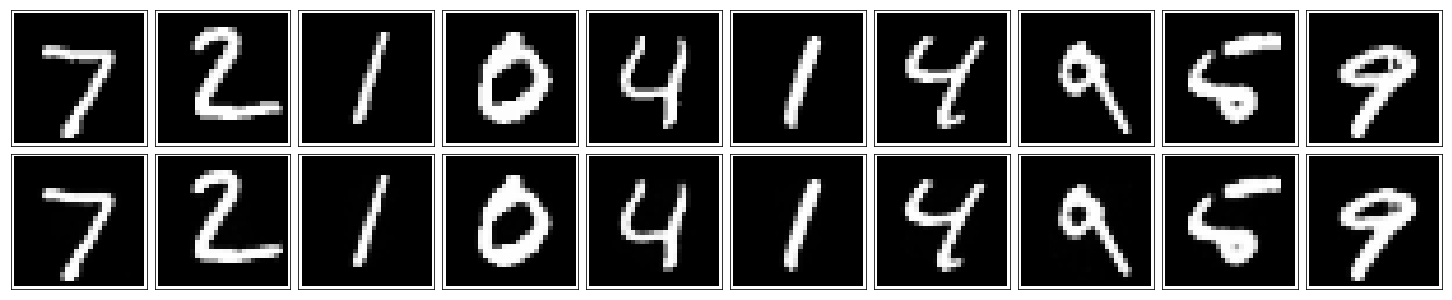

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.